# Export VE Data as DataFrame for LME Cue Analysis

In [431]:
import csv
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [432]:
# residuals, complete ground plane, viewing duration, stimulus 

In [433]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# dpath = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# actual depth
with open(dpath + 'X_125.npy' , 'rb') as f:
    ad_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'X_250.npy' , 'rb') as f:
    ad_250 = np.load(f, allow_pickle=True)
    
with open(dpath + 'X_1000.npy' , 'rb') as f:
    ad_1000 = np.load(f, allow_pickle=True)
    
# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# residuals
with open(dpath + 'residuals/'+ 'z_residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'z_residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'z_residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)
    
# difference between z-scored estimate and z-scored actual depth
with open(dpath + '/diff_125.npy' , 'rb') as f:
    diff_125 = np.load(f, allow_pickle=True)
with open(dpath + '/diff_250.npy' , 'rb') as f:
    diff_250 = np.load(f, allow_pickle=True) 
with open(dpath + '/diff_1000.npy' , 'rb') as f:
    diff_1000= np.load(f, allow_pickle=True)
    

In [434]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'

gp_size_dict = json.load(open(path))

# Find GP or VGP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')
        
ordered_gp_size = []
gp_none = 0


for folder in [elem.split('/')[1][:-2] for elem in stim_250]:
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)

002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize excluded


In [435]:
len(cleaned_gpsize_dict)

149

In [436]:

completeGP = []

trunc_residuals_125 = []
trunc_residuals_250 = []
trunc_residuals_1000 = []

trunc_ad_125 = []
trunc_ad_250 = []
trunc_ad_1000 = []



stimulus = []

for stim in list(cleaned_gpsize_dict.keys()):
    index_125 = [elem.split('/')[1][:-2] for elem in stim_125].index(stim)
    index_250 = [elem.split('/')[1][:-2] for elem in stim_250].index(stim)
    index_1000 = [elem.split('/')[1][:-2] for elem in stim_1000].index(stim)
        
    trunc_residuals_125.append(residuals_125[index_125])
    trunc_residuals_250.append(residuals_250[index_250])
    trunc_residuals_1000.append(residuals_1000[index_1000])
    
    trunc_ad_125.append(ad_125[index_125])
    trunc_ad_250.append(ad_250[index_250])
    trunc_ad_1000.append(ad_1000[index_1000])
        
    completeGP.append(cleaned_gpsize_dict[stim])
        
    stimulus.append(stim)
        
    
len(trunc_residuals_125), len(trunc_residuals_250), len(trunc_residuals_1000), len(completeGP), len(stimulus), len(trunc_ad_1000)

(149, 149, 149, 149, 149, 149)

In [437]:
len([125] * len(trunc_residuals_125))

149

In [438]:
len(np.concatenate((np.abs(np.array(trunc_residuals_125)), np.abs(np.array(trunc_residuals_250)), np.abs(np.array(trunc_residuals_1000))), axis=0),)

447

In [439]:
# initialize data of lists.
data = {'residuals': trunc_residuals_125+trunc_residuals_250+trunc_residuals_1000,
        'abs_residuals': np.concatenate((np.abs(np.array(trunc_residuals_125)), np.abs(np.array(trunc_residuals_250)), np.abs(np.array(trunc_residuals_1000))), axis=0),
        'duration': [125] * len(trunc_residuals_125) + [250] * len(trunc_residuals_250) + [1000] * len(trunc_residuals_1000),
        'groundPlane': completeGP * 3,
        'stimulus': stimulus * 3,
        'actual_depth': trunc_ad_125 + trunc_ad_250 + trunc_ad_1000}
  
# Create DataFrame
df = pd.DataFrame(data)
df

,residuals,abs_residuals,duration,groundPlane,stimulus,actual_depth
0,-0.583161,0.583161,125,11.910828,000854_2014-06-09_19-43-13_260595134347_rgbf00...,3.0680
1,0.275925,0.275925,125,11.913177,000758_2014-06-08_22-05-08_260595134347_rgbf00...,3.3810
2,-0.327997,0.327997,125,11.598019,002103_2014-06-25_20-00-40_260595134347_rgbf00...,4.1050
3,-0.147574,0.147574,125,15.524304,002039_2014-06-24_20-22-38_260595134347_rgbf00...,4.4080
4,-0.156264,0.156264,125,18.915500,000742_2014-06-08_18-48-09_260595134347_rgbf00...,4.6320
...,...,...,...,...,...,...
442,-0.284820,0.284820,1000,28.953813,002964_2014-06-08_17-46-11_094959634447_rgbf00...,1.6910
443,0.001737,0.001737,1000,15.893099,000943_2014-06-09_19-31-07_260595134347_rgbf00...,1.9765
444,0.078397,0.078397,1000,10.664824,003070_2014-06-15_14-58-27_094959634447_rgbf00...,2.9415
445,-0.068851,0.068851,1000,14.398279,001132_2014-06-17_14-48-54_260595134347_rgbf00...,3.7530


In [440]:
df.to_csv('groundPlane_data_for_lme.csv', index=False)

In [441]:
df_125 = df.loc[df['duration']==125]
df_250 = df.loc[df['duration']==250]
df_1000 = df.loc[df['duration']==1000]



# Add Participant Residuals

In [442]:
# p = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/participant_residuals.csv'
p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/participant_residuals.csv'

p_data = pd.read_csv(p) 
p_stimuli = list(p_data.stimulus.unique())


In [443]:
p_data

,subjID,duration,s_residual,abs_s_residual,stimulus,error,abs_error,actual_depth
0,541423.0,125,0.906977,0.906977,001808_2014-06-26_20-50-58_260595134347_rgbf00...,-2.759331,2.759331,4.2490
1,541423.0,125,1.590297,1.590297,001815_2014-06-26_20-52-55_260595134347_rgbf00...,-1.635132,1.635132,3.3865
2,541423.0,125,-0.355174,0.355174,001029_2014-06-08_13-17-57_260595134347_rgbf00...,-3.425721,3.425721,3.0835
3,541423.0,125,-0.847848,0.847848,000677_2014-06-08_23-10-32_260595134347_rgbf00...,-4.159920,4.159920,3.5560
4,541423.0,125,-0.403006,0.403006,002118_2014-06-25_20-32-08_260595134347_rgbf00...,-3.249920,3.249920,2.6460
...,...,...,...,...,...,...,...,...
71127,351649.0,250,0.593507,0.593507,002875_2014-06-01_15-19-00_094959634447_rgbf00...,-1.945729,1.945729,1.9675
71128,351649.0,250,-0.542151,0.542151,001092_2014-06-15_17-34-58_260595134347_rgbf00...,-3.426449,3.426449,2.6935
71129,351649.0,250,-0.513911,0.513911,002545_2014-06-24_13-38-53_094959634447_rgbf00...,-3.030808,3.030808,1.9205
71130,351649.0,250,0.277538,0.277538,001167_2014-06-17_15-38-07_260595134347_rgbf00...,-2.206089,2.206089,1.8505


In [444]:
incl_stimuli = stimulus

# images that we do not have ground plane and/or clutter data for 
excluded_stimuli = [x for x in p_stimuli if x not in incl_stimuli]

len(excluded_stimuli)

7

In [445]:
# remove all rows that have data for images that we do not have ground plane and/or clutter data for
p_data = p_data[p_data.stimulus.isin(excluded_stimuli) == False]

len(p_data.stimulus.unique())

149

https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d



In [446]:
def assignGroundPlane(row):  
    stim = row['stimulus']
    groundPlane = cleaned_gpsize_dict[stim]
    
    return groundPlane



In [447]:
# add groundPlane data to the df by referencing the GP value for each image
p_data['groundPlane'] = p_data.apply(lambda row: assignGroundPlane(row), axis=1)


/Users/prachimahableshwarkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [448]:
cleaned_gpsize_dict['001808_2014-06-26_20-50-58_260595134347_rgbf000029-resize']

20.030651550568866

In [449]:
p_data['duration'] = p_data['duration'].div(100)


/Users/prachimahableshwarkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [450]:
p_data_125 = p_data.loc[p_data['duration'] == 1.25]
p_data_250 = p_data.loc[p_data['duration'] == 2.50]
p_data_1000 = p_data.loc[p_data['duration']== 10.00]


In [451]:
p_data_125.columns

Index(['subjID', 'duration', 's_residual', 'abs_s_residual', 'stimulus',
       'error', 'abs_error', 'actual_depth', 'groundPlane'],
      dtype='object')

In [452]:
p_data.to_csv('groundPlane_participantData_for_lme.csv', index=False)

p_data_125.to_csv('125_groundPlane_participantData_for_lme.csv', index=False)
p_data_250.to_csv('250_groundPlane_participantData_for_lme.csv', index=False)
p_data_1000.to_csv('1000_groundPlane_participantData_for_lme.csv', index=False)


In [453]:
pos_p_data = p_data.loc[p_data['s_residual'] > 0]
neg_p_data = p_data.loc[p_data['s_residual'] < 0]

pos_p_data.to_csv('pos_groundPlane_participantData_for_lme.csv', index=False)
neg_p_data.to_csv('neg_groundPlane_participantData_for_lme.csv', index=False)

In [454]:
pos_p_data_125 = pos_p_data.loc[pos_p_data['duration']==1.25]
pos_p_data_250 = pos_p_data.loc[pos_p_data['duration']==2.50]
pos_p_data_1000 = pos_p_data.loc[pos_p_data['duration']==10.00]

neg_p_data_125 = neg_p_data.loc[neg_p_data['duration']==1.25]
neg_p_data_250 = neg_p_data.loc[neg_p_data['duration']==2.50]
neg_p_data_1000 = neg_p_data.loc[neg_p_data['duration']==10.00]


pos_p_data_125.to_csv('125_pos_groundPlane_participantData_for_lme.csv', index=False)
pos_p_data_250.to_csv('250_pos_groundPlane_participantData_for_lme.csv', index=False)
pos_p_data_1000.to_csv('1000_pos_groundPlane_participantData_for_lme.csv', index=False)

neg_p_data_125.to_csv('125_neg_groundPlane_participantData_for_lme.csv', index=False)
neg_p_data_250.to_csv('250_neg_groundPlane_participantData_for_lme.csv', index=False)
neg_p_data_1000.to_csv('1000_neg_groundPlane_participantData_for_lme.csv', index=False)

In [455]:
cols = p_data.columns.tolist()
cols = ['duration', 'subjID', 'stimulus', 's_residual', 'abs_s_residual', 'abs_error', 'error','groundPlane', 'actual_depth']

p_data = p_data[cols]


In [456]:
p_data.columns[:]

Index(['duration', 'subjID', 'stimulus', 's_residual', 'abs_s_residual',
       'abs_error', 'error', 'groundPlane', 'actual_depth'],
      dtype='object')

In [457]:
p_data_grouped = p_data.groupby('stimulus')[p_data.columns[2:]].mean()
p_data_grouped_125 = p_data_125.groupby('stimulus')[p_data_125.columns[2:]].mean()
p_data_grouped_250 = p_data_250.groupby('stimulus')[p_data_250.columns[2:]].mean()
p_data_grouped_1000 = p_data_1000.groupby('stimulus')[p_data_1000.columns[2:]].mean()

In [458]:
p_data_grouped.to_csv('groundPlane_participantData_grouped_for_lme.csv', index=False)
p_data_grouped_125.to_csv('125_groundPlane_participantData_grouped_for_lme.csv', index=False)
p_data_grouped_250.to_csv('250_groundPlane_participantData_grouped_for_lme.csv', index=False)
p_data_grouped_1000.to_csv('1000_groundPlane_participantData_grouped_for_lme.csv', index=False)

In [459]:
pos_p_data_grouped = p_data_grouped.loc[p_data_grouped['s_residual'] > 0]
neg_p_data_grouped = p_data_grouped.loc[p_data_grouped['s_residual'] < 0]

pos_p_data_grouped.to_csv('pos_groundPlane_participantData_grouped_for_lme.csv', index=False)
neg_p_data_grouped.to_csv('neg_groundPlane_participantData_grouped_for_lme.csv', index=False)

In [460]:
# p_data_125

In [461]:
pos_p_data_grouped_125 = p_data_grouped_125.loc[p_data_grouped_125['s_residual'] > 0]
pos_p_data_grouped_250 = p_data_grouped_250.loc[p_data_grouped_250['s_residual'] > 0]
pos_p_data_grouped_1000 = p_data_grouped_1000.loc[p_data_grouped_1000['s_residual'] > 0]

neg_p_data_grouped_125 = p_data_grouped_125.loc[p_data_grouped_125['s_residual'] < 0]
neg_p_data_grouped_250 = p_data_grouped_250.loc[p_data_grouped_250['s_residual'] < 0]
neg_p_data_grouped_1000 = p_data_grouped_1000.loc[p_data_grouped_1000['s_residual'] < 0]

pos_p_data_grouped_125.to_csv('125_pos_groundPlane_participantData_grouped_for_lme.csv', index=False)
pos_p_data_grouped_250.to_csv('250_pos_groundPlane_participantData_grouped_for_lme.csv', index=False)
pos_p_data_grouped_1000.to_csv('1000_pos_groundPlane_participantData_grouped_for_lme.csv', index=False)

neg_p_data_grouped_125.to_csv('125_neg_groundPlane_participantData_grouped_for_lme.csv', index=False)
neg_p_data_grouped_250.to_csv('250_neg_groundPlane_participantData_grouped_for_lme.csv', index=False)
neg_p_data_grouped_1000.to_csv('1000_neg_groundPlane_participantData_grouped_for_lme.csv', index=False)

In [462]:
len(pos_p_data_grouped_125['s_residual']), len(neg_p_data_grouped_125['s_residual'])

(69, 80)

In [463]:
print(stats.ttest_ind(np.array(p_data_125['abs_s_residual']), np.array(p_data_250['abs_s_residual'])))
print(stats.ttest_ind(np.array(p_data_125['abs_s_residual']), np.array(p_data_1000['abs_s_residual'])))
print(stats.ttest_ind(np.array(p_data_250['abs_s_residual']), np.array(p_data_1000['abs_s_residual'])))

Ttest_indResult(statistic=3.914300948766056, pvalue=9.079932117470319e-05)
Ttest_indResult(statistic=3.992179285036454, pvalue=6.557200422131788e-05)
Ttest_indResult(statistic=-0.015821635683873653, pvalue=0.9873767573535375)


## Plot 

In [464]:
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

#### Abs(Residuals) x Complete Ground Plane (m2) - plots by duration


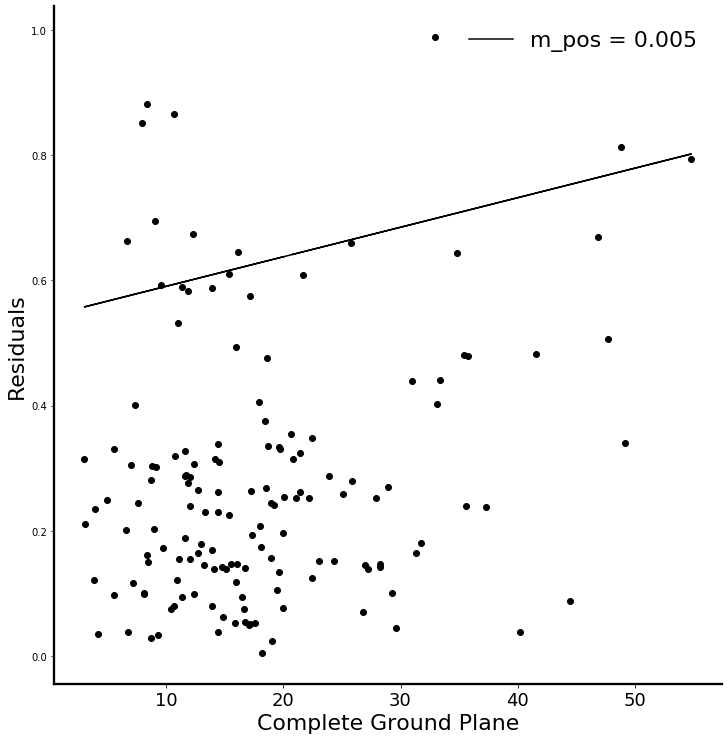

In [465]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(p_data_125['groundPlane']).reshape(-1,1)
y = list(p_data_125['abs_s_residual'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(np.array(df_125['groundPlane']).reshape(-1,1), list(df_125['abs_residuals']), 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.plot(X,y_predicted,color='black', label = 'm_pos = ' + str(round(reg.coef_[0], 3)))


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane", fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
# plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 1, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

# plt.savefig('pos_neg_GP_residuals.png', dpi=300)

In [466]:
ste_abs_s_residual_125 = []

for stim in list(df_125['stimulus']):
    stim_df = p_data_125.loc[p_data_125['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    ste_abs_s_residual_125.append(std_abs_s_residual)

ste_abs_s_residual_250 = []

for stim in list(df_250['stimulus']):
    stim_df = p_data_250.loc[p_data_250['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    ste_abs_s_residual_250.append(std_abs_s_residual)
    
    
ste_abs_s_residual_1000 = []

for stim in list(df_1000['stimulus']):
    stim_df = p_data_1000.loc[p_data_1000['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    ste_abs_s_residual_1000.append(std_abs_s_residual)

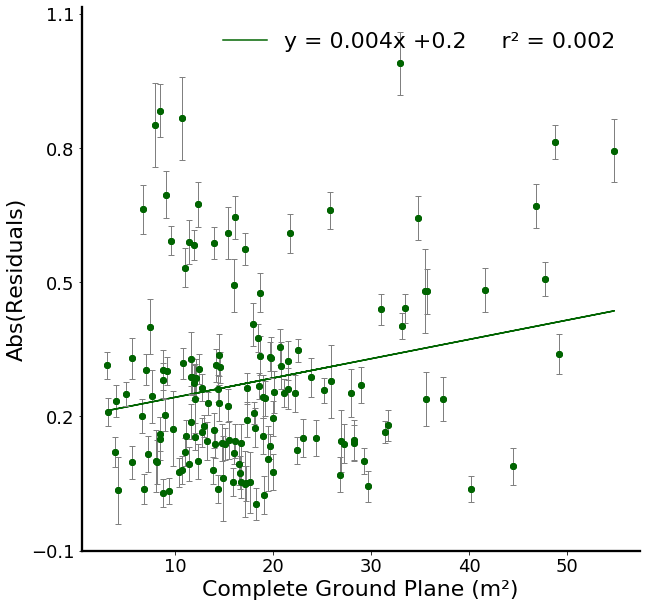

In [467]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(df_125['groundPlane']).reshape(-1,1)
y = list(df_125['abs_residuals'])
reg = LinearRegression().fit(X, y)
ste = ste_abs_s_residual_125

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 1);
plt.plot(X,y_predicted,color='darkgreen', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)**2), 3)))

plt.errorbar(X, y, yerr=ste, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkgreen", mec = "darkgreen", capsize = 3)

# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Abs(Residuals)", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-.1,1.1, 0.3), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('GP_Abs(residuals)_125.png', dpi=300)

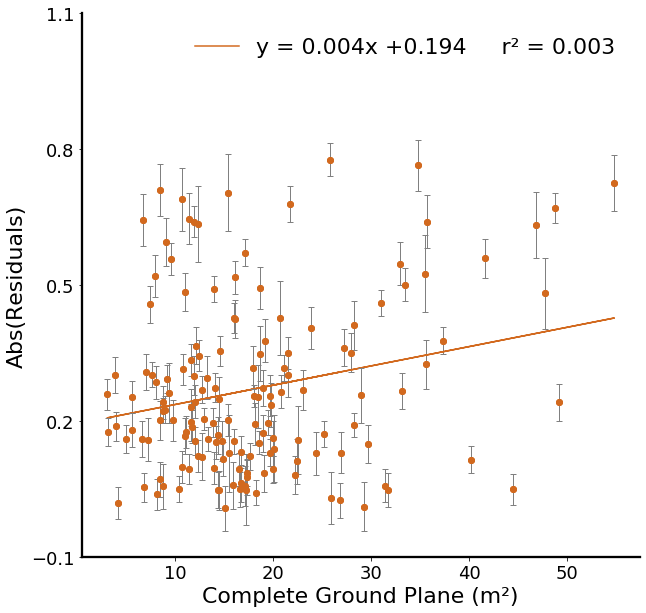

In [468]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(df_250['groundPlane']).reshape(-1,1)
y = list(df_250['abs_residuals'])
reg = LinearRegression().fit(X, y)
ste = ste_abs_s_residual_250

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='chocolate', alpha = 1);
plt.plot(X,y_predicted,color='chocolate', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)**2), 3)))

plt.errorbar(X, y, yerr=ste, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "chocolate", mec = "chocolate", capsize = 3)

# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Abs(Residuals)", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-.1,1.1, 0.3), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('GP_Abs(residuals)_250.png', dpi=300)

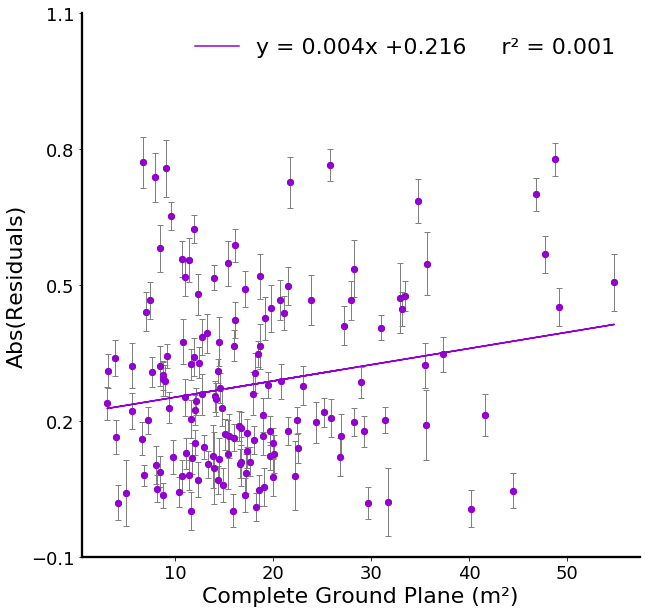

In [469]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(df_1000['groundPlane']).reshape(-1,1)
y = list(df_1000['abs_residuals'])
reg = LinearRegression().fit(X, y)
ste = ste_abs_s_residual_1000

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkviolet', alpha = 1);
plt.plot(X,y_predicted,color='darkviolet', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)**2), 3)))

plt.errorbar(X, y, yerr=ste, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkviolet", mec = "darkviolet", capsize = 3)

# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Abs(Residuals)", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-.1,1.1, 0.3), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('GP_Abs(residuals)_1000.png', dpi=300)

In [470]:
# pos
pos_ste_abs_s_residual_125 = []

for stim in list(pos_df_125['stimulus']):
    stim_df = pos_p_data_125.loc[pos_p_data_125['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['s_residual']))
    pos_ste_abs_s_residual_125.append(std_abs_s_residual)

pos_ste_abs_s_residual_250 = []

for stim in list(pos_df_250['stimulus']):
    stim_df = pos_p_data_250.loc[pos_p_data_250['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['s_residual']))
    pos_ste_abs_s_residual_250.append(std_abs_s_residual)
    
    
pos_ste_abs_s_residual_1000 = []

for stim in list(pos_df_1000['stimulus']):
    stim_df = pos_p_data_1000.loc[pos_p_data_1000['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['s_residual']))
    pos_ste_abs_s_residual_1000.append(std_abs_s_residual)

# neg
neg_ste_abs_s_residual_125 = []

for stim in list(neg_df_125['stimulus']):
    stim_df = neg_p_data_125.loc[neg_p_data_125['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['s_residual']))
    neg_ste_abs_s_residual_125.append(std_abs_s_residual)

neg_ste_abs_s_residual_250 = []

for stim in list(neg_df_250['stimulus']):
    stim_df = neg_p_data_250.loc[neg_p_data_250['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['s_residual']))
    neg_ste_abs_s_residual_250.append(std_abs_s_residual)
    
    
neg_ste_abs_s_residual_1000 = []

for stim in list(neg_df_1000['stimulus']):
    stim_df = neg_p_data_1000.loc[neg_p_data_1000['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['s_residual']))
    neg_ste_abs_s_residual_1000.append(std_abs_s_residual)
    
len(pos_ste_abs_s_residual_125)

69

In [471]:
pos_df = df.loc[df['residuals'] > 0]
neg_df = df.loc[df['residuals'] < 0]


pos_df.to_csv('groundPlane_pos.csv', index=False)
neg_df.to_csv('groundPlane_neg.csv', index=False)

In [472]:
print('Pos residuals x GP: ',stats.pearsonr(list(pos_df['groundPlane']), list(pos_df['residuals'])))
print('Neg residuals x GP: ',stats.pearsonr(list(neg_df['groundPlane']), list(neg_df['residuals'])))


Pos residuals x GP:  (0.19798417151270925, 0.0046329665779752775)
Neg residuals x GP:  (-0.29964143338414084, 1.8746638582777696e-06)


In [473]:
pos_df_125 = pos_df.loc[pos_df['duration']==125]
pos_df_250 = pos_df.loc[pos_df['duration']==250]
pos_df_1000 = pos_df.loc[pos_df['duration']==1000]


neg_df_125 = neg_df.loc[neg_df['duration']==125]
neg_df_250 = neg_df.loc[neg_df['duration']==250]
neg_df_1000 = neg_df.loc[neg_df['duration']==1000]

In [474]:
len(pos_ste_abs_s_residual_125)

69

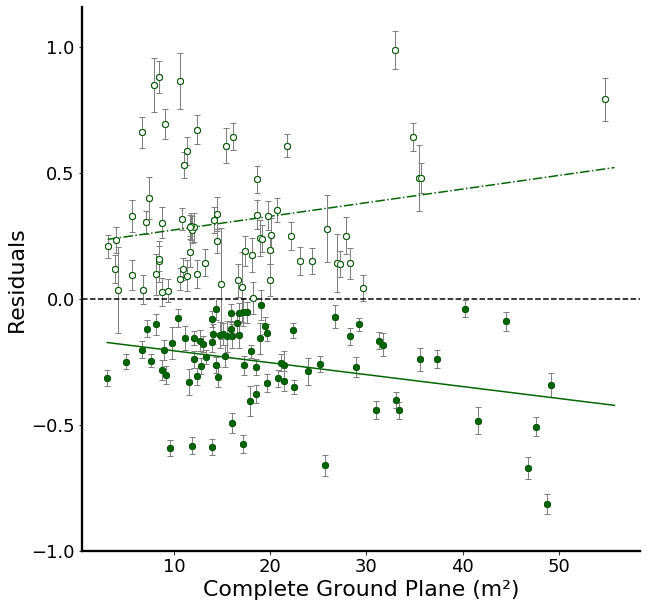

In [475]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df_125['groundPlane']).reshape(-1,1)
y = list(pos_df_125['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

# plt.plot(X,y_predicted,color='darkgreen', label = 'y_pos = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)))
plt.errorbar(X, y, yerr=pos_ste_abs_s_residual_125, elinewidth = 1, ecolor = "gray", mfc='white', fmt = 'or', mec = "darkgreen", capsize = 3)


a = np.linspace(np.min(X),np.max(X)+1,100)
b = reg.coef_[0]*a +reg.intercept_
plt.plot(a, b, 'darkgreen', label = 'y_pos = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)), linestyle='dashdot')



X_neg = np.array(neg_df_125['groundPlane']).reshape(-1,1)
y_neg = list(neg_df_125['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

# plt.plot(X_neg,y_predicted_neg,color='darkgreen', label = 'y_neg = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X, y)), 3)))
plt.errorbar(X_neg, y_neg, yerr=neg_ste_abs_s_residual_125, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkgreen", mec = "darkgreen", capsize = 3)

c = np.linspace(np.min(X_neg),np.max(X)+1,100)
d = reg_neg.coef_[0]*c +reg_neg.intercept_
plt.plot(c, d, 'darkgreen', label = 'y_neg = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.axhline(y=0, color='black', linestyle='--')


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

# legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('pos_neg_GP_residuals_125.png', dpi=300)

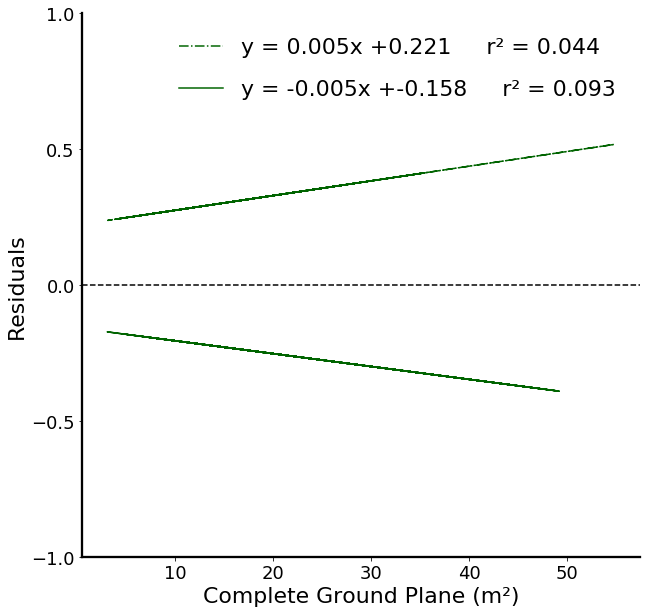

In [476]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df_125['groundPlane']).reshape(-1,1)
y = list(pos_df_125['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
# plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.plot(X,y_predicted,color='darkgreen', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)), linestyle='dashdot')
# plt.errorbar(X, y, yerr=pos_ste_abs_s_residual_125, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkgreen", mec = "darkgreen", capsize = 3)

X_neg = np.array(neg_df_125['groundPlane']).reshape(-1,1)
y_neg = list(neg_df_125['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
# plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.plot(X_neg,y_predicted_neg,color='darkgreen', label = 'y = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))
# plt.errorbar(X_neg, y_neg, yerr=neg_ste_abs_s_residual_125, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkgreen", mec = "darkgreen", capsize = 3)

plt.axhline(y=0, color='black', linestyle='--')


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('LEGEND_pos_neg_GP_residuals_125.png', dpi=300)

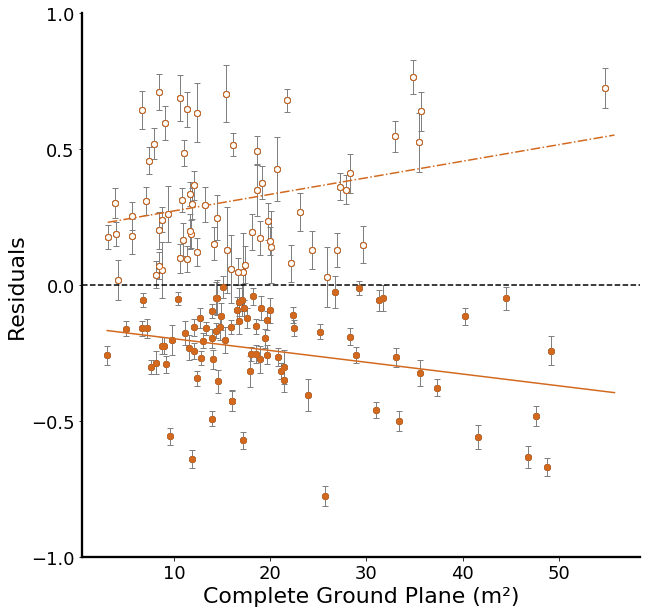

In [477]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df_250['groundPlane']).reshape(-1,1)
y = list(pos_df_250['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

# plt.plot(X,y_predicted,color='chocolate', label = 'y_pos = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)))
plt.errorbar(X, y, yerr=pos_ste_abs_s_residual_250, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "chocolate", capsize = 3)

a = np.linspace(np.min(X),np.max(X)+1,100)
b = reg.coef_[0]*a +reg.intercept_
plt.plot(a, b, 'chocolate', label = 'y_pos = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)), linestyle='dashdot')

X_neg = np.array(neg_df_250['groundPlane']).reshape(-1,1)
y_neg = list(neg_df_250['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

# plt.plot(X_neg,y_predicted_neg,color='chocolate', label = 'y_neg = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)))
plt.errorbar(X_neg, y_neg, yerr=neg_ste_abs_s_residual_250, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "chocolate", mec = "chocolate", capsize = 3)

c = np.linspace(np.min(X_neg),np.max(X)+1,100)
d = reg_neg.coef_[0]*c +reg_neg.intercept_
plt.plot(c, d, 'chocolate', label = 'y_neg = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.axhline(y=0, color='black', linestyle='--')


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

# legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('pos_neg_GP_residuals_250.png', dpi=300)

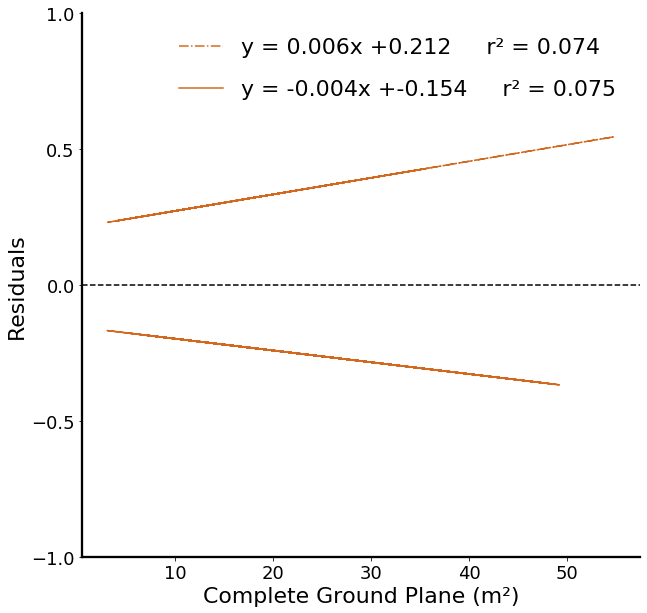

In [478]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df_250['groundPlane']).reshape(-1,1)
y = list(pos_df_250['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
# plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.plot(X,y_predicted,color='chocolate', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)), linestyle='dashdot')
# plt.errorbar(X, y, yerr=pos_ste_abs_s_residual_250, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "chocolate", mec = "chocolate", capsize = 3)

X_neg = np.array(neg_df_250['groundPlane']).reshape(-1,1)
y_neg = list(neg_df_250['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
# plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.plot(X_neg,y_predicted_neg,color='chocolate', label = 'y = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))
# plt.errorbar(X_neg, y_neg, yerr=neg_ste_abs_s_residual_250, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "chocolate", mec = "chocolate", capsize = 3)

plt.axhline(y=0, color='black', linestyle='--')


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('LEGEND_pos_neg_GP_residuals_250.png', dpi=300)

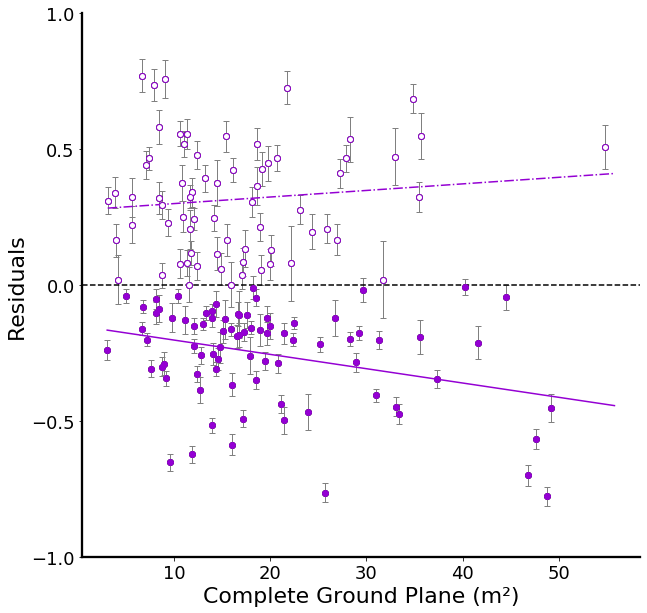

In [479]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df_1000['groundPlane']).reshape(-1,1)
y = list(pos_df_1000['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

# plt.plot(X,y_predicted,color='darkviolet', label = 'y_pos = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)))
plt.errorbar(X, y, yerr=pos_ste_abs_s_residual_1000, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "darkviolet", capsize = 3)

a = np.linspace(np.min(X),np.max(X)+1,100)
b = reg.coef_[0]*a +reg.intercept_
plt.plot(a, b, 'darkviolet', label = 'y_pos = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)), linestyle='dashdot')

X_neg = np.array(neg_df_1000['groundPlane']).reshape(-1,1)
y_neg = list(neg_df_1000['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

# plt.plot(X_neg,y_predicted_neg,color='darkviolet', label = 'y_neg = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X, y)), 3)))
plt.errorbar(X_neg, y_neg, yerr=neg_ste_abs_s_residual_1000, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkviolet", mec = "darkviolet", capsize = 3)

c = np.linspace(np.min(X_neg),np.max(X)+1,100)
d = reg_neg.coef_[0]*c +reg_neg.intercept_
plt.plot(c, d, 'darkviolet', label = 'y_neg = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.axhline(y=0, color='black', linestyle='--')


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

# legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('pos_neg_GP_residuals_1000.png', dpi=300)

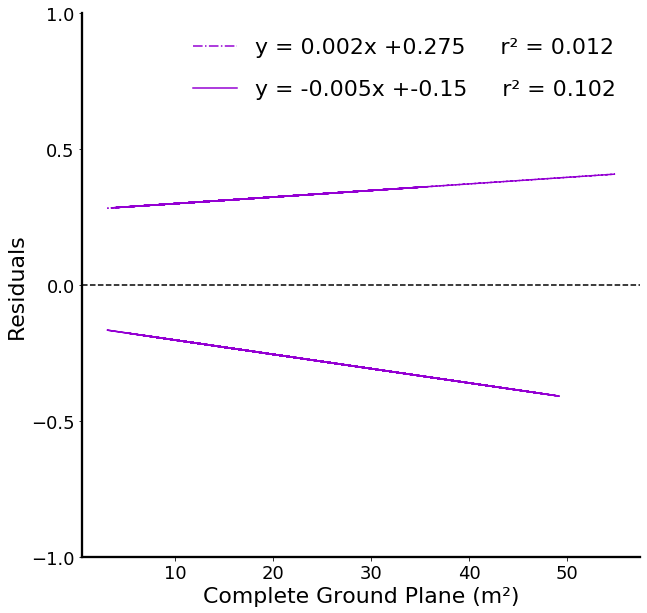

In [480]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df_1000['groundPlane']).reshape(-1,1)
y = list(pos_df_1000['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
# plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.plot(X,y_predicted,color='darkviolet', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)), 3)), linestyle='dashdot')
# plt.errorbar(X, y, yerr=pos_ste_abs_s_residual_1000, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkviolet", mec = "darkviolet", capsize = 3)

X_neg = np.array(neg_df_1000['groundPlane']).reshape(-1,1)
y_neg = list(neg_df_1000['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
# plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.plot(X_neg,y_predicted_neg,color='darkviolet', label = 'y = ' + str(round(reg_neg.coef_[0], 3)) + 'x +' + str(round(reg_neg.intercept_, 3))
         + '     r' + get_super('2') + ' = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))
# plt.errorbar(X_neg, y_neg, yerr=neg_ste_abs_s_residual_1000, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkviolet", mec = "darkviolet", capsize = 3)

plt.axhline(y=0, color='black', linestyle='--')

 
# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('LEGEND_pos_neg_GP_residuals_1000.png', dpi=300)

In [481]:
str(round(float(reg.score(X, y)), 8))

'0.0120211'

In [316]:
str(round(float(reg.score(X, y)**2), 8))

'0.00014451'

In [318]:
0.012 ** 2

0.000144

In [371]:
len(X), len(X_neg)

(68, 81)

In [495]:
was_neg_resid_125 = df_125.loc[df_125['residuals'] < 0]
was_pos_resid_125 = df_125.loc[df_125['residuals'] > 0]

was_neg_ste_abs_s_residual_125 = []

for stim in list(was_neg_resid_125['stimulus']):
    stim_df = p_data_125.loc[p_data_125['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    was_neg_ste_abs_s_residual_125.append(std_abs_s_residual)

was_pos_ste_abs_s_residual_125 = []

for stim in list(was_pos_resid_125['stimulus']):
    stim_df = p_data_125.loc[p_data_125['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    was_pos_ste_abs_s_residual_125.append(std_abs_s_residual)

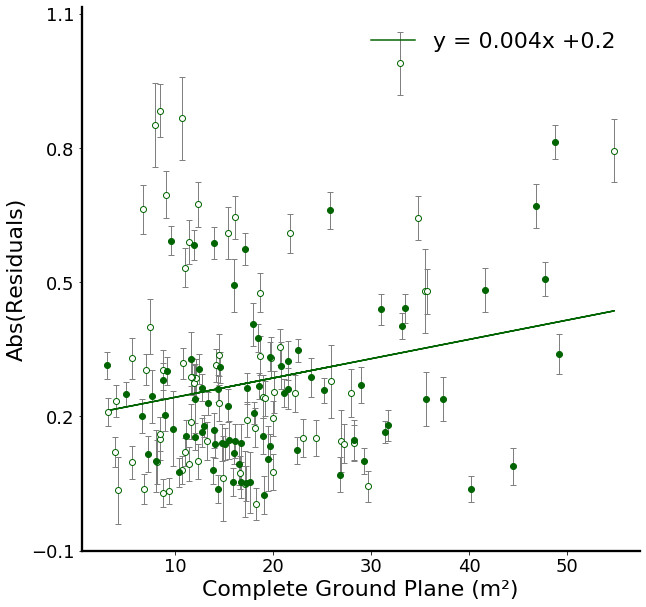

In [507]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(df_125['groundPlane']).reshape(-1,1)
y = list(df_125['abs_residuals'])
reg = LinearRegression().fit(X, y)
ste = ste_abs_s_residual_125

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values

plt.errorbar(np.array(was_pos_resid_125['groundPlane']).reshape(-1,1), list(was_pos_resid_125['abs_residuals']),yerr=was_pos_ste_abs_s_residual_125,elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "darkgreen", capsize = 3)
plt.errorbar(np.array(was_neg_resid_125['groundPlane']).reshape(-1,1), list(was_neg_resid_125['abs_residuals']),yerr=was_neg_ste_abs_s_residual_125, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkgreen", mec = "darkgreen", capsize = 3)


# plt.plot(X,y_predicted,color='darkgreen', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)**2), 3)))

plt.plot(X,y_predicted,color='darkgreen', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3)))

# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Abs(Residuals)", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-.1,1.1, 0.3), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 1, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('GP_Abs(residuals)_125.png', dpi=300)

In [499]:
was_neg_resid_250 = df_250.loc[df_250['residuals'] < 0]
was_pos_resid_250 = df_250.loc[df_250['residuals'] > 0]

was_neg_ste_abs_s_residual_250 = []

for stim in list(was_neg_resid_250['stimulus']):
    stim_df = p_data_250.loc[p_data_250['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    was_neg_ste_abs_s_residual_250.append(std_abs_s_residual)

was_pos_ste_abs_s_residual_250 = []

for stim in list(was_pos_resid_250['stimulus']):
    stim_df = p_data_250.loc[p_data_250['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    was_pos_ste_abs_s_residual_250.append(std_abs_s_residual)

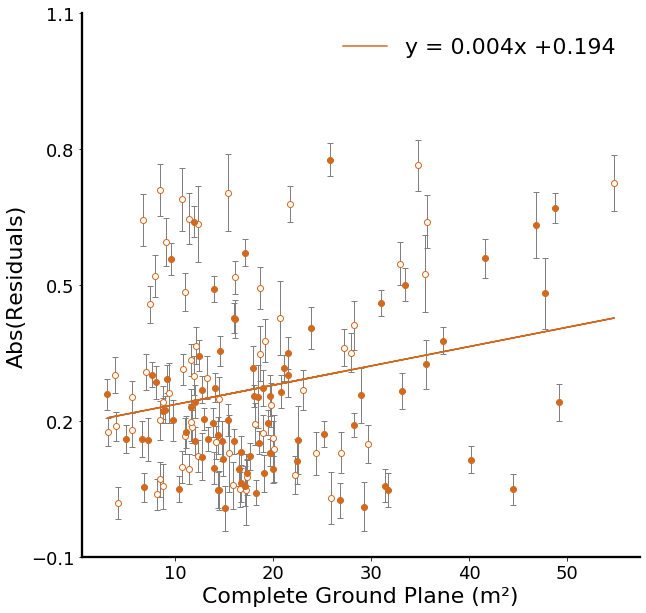

In [505]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(df_250['groundPlane']).reshape(-1,1)
y = list(df_250['abs_residuals'])
reg = LinearRegression().fit(X, y)
ste = ste_abs_s_residual_125

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values

plt.errorbar(np.array(was_pos_resid_250['groundPlane']).reshape(-1,1), list(was_pos_resid_250['abs_residuals']),yerr=was_pos_ste_abs_s_residual_250,elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "chocolate", capsize = 3)
plt.errorbar(np.array(was_neg_resid_250['groundPlane']).reshape(-1,1), list(was_neg_resid_250['abs_residuals']),yerr=was_neg_ste_abs_s_residual_250, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "chocolate", mec = "chocolate", capsize = 3)


# plt.plot(X,y_predicted,color='chocolate', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)**2), 3)))

plt.plot(X,y_predicted,color='chocolate', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3)))

# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Abs(Residuals)", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-.1,1.1, 0.3), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('GP_Abs(residuals)_250.png', dpi=300)

In [501]:
was_neg_resid_1000 = df_1000.loc[df_1000['residuals'] < 0]
was_pos_resid_1000 = df_1000.loc[df_1000['residuals'] > 0]

was_neg_ste_abs_s_residual_1000 = []

for stim in list(was_neg_resid_1000['stimulus']):
    stim_df = p_data_1000.loc[p_data_1000['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    was_neg_ste_abs_s_residual_1000.append(std_abs_s_residual)

was_pos_ste_abs_s_residual_1000 = []

for stim in list(was_pos_resid_1000['stimulus']):
    stim_df = p_data_1000.loc[p_data_1000['stimulus']==stim]
    std_abs_s_residual = stats.sem(np.array(stim_df['abs_s_residual']))
    was_pos_ste_abs_s_residual_1000.append(std_abs_s_residual)

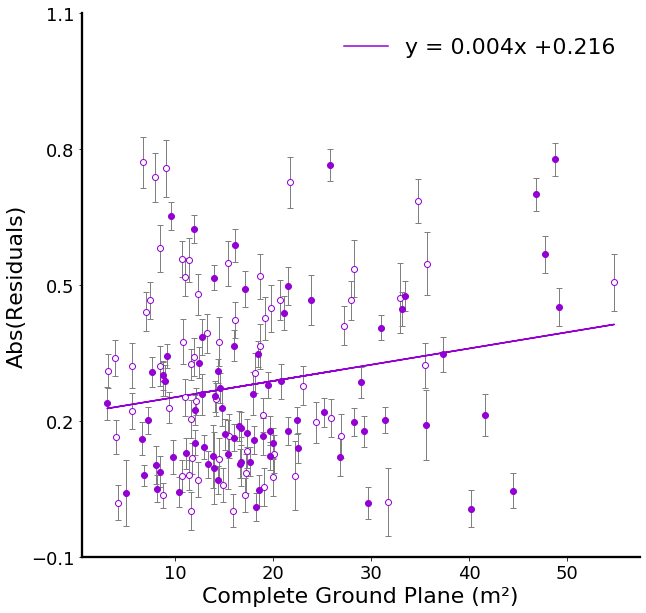

In [504]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(df_1000['groundPlane']).reshape(-1,1)
y = list(df_1000['abs_residuals'])
reg = LinearRegression().fit(X, y)
ste = ste_abs_s_residual_1000

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values

plt.errorbar(np.array(was_pos_resid_1000['groundPlane']).reshape(-1,1), list(was_pos_resid_1000['abs_residuals']),yerr=was_pos_ste_abs_s_residual_1000,elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "darkviolet", capsize = 3)
plt.errorbar(np.array(was_neg_resid_1000['groundPlane']).reshape(-1,1), list(was_neg_resid_1000['abs_residuals']),yerr=was_neg_ste_abs_s_residual_1000, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "darkviolet", mec = "darkviolet", capsize = 3)


# plt.plot(X,y_predicted,color='darkviolet', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3))
#          + '     r' + get_super('2') + ' = ' + str(round(float(reg.score(X, y)**2), 3)))

plt.plot(X,y_predicted,color='darkviolet', label = 'y = ' + str(round(reg.coef_[0], 3)) + 'x +' + str(round(reg.intercept_, 3)))

# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane (m" + get_super('2') + ')', fontsize = 22)
plt.ylabel("Abs(Residuals)", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-.1,1.1, 0.3), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('GP_Abs(residuals)_1000.png', dpi=300)